In [8]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed = 99

In [2]:
# Reading the input file
telco_df = pd.read_excel('Telco-Customer-Churn.xlsx')

In [13]:
#pip install openpyxl  
# to read a csv, install openpyxl

     |████████████████████████████████| 242 kB 8.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
telco_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
#Basics of Exploratory Data Analysis

In [4]:
telco_df.isna().sum()  #There are no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
# In case we plan to use a linear model or DNN, we need to scale the values. 
# SeniorCitizen is in the range 0-1 but the MonthlyCharges is in range - 18.25 to 118.75

<AxesSubplot:xlabel='gender', ylabel='count'>

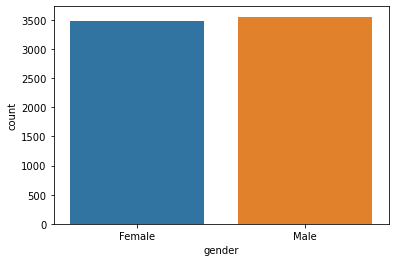

In [6]:
sns.countplot(x='gender', data=telco_df)

In [24]:
# From the above, we can see, the Male and Female are distributed equally

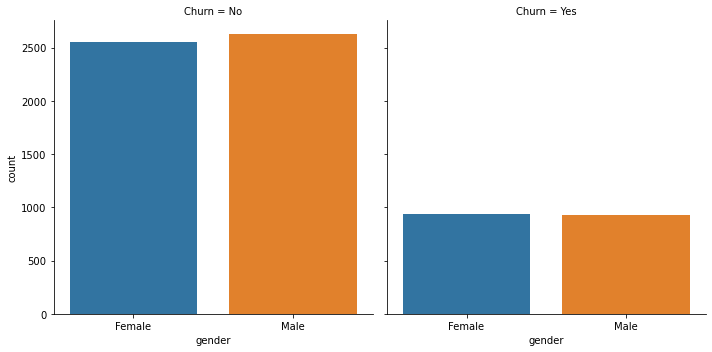

In [9]:
sns.factorplot(x='gender', col='Churn', kind='count', data=telco_df)

In [26]:
# From the above graph, we can see that the both Female and Males have almost equal churn rate.
# Hence we can conclude that the gender has no effect on the churn

In [10]:
telco_df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [11]:
telco_df = telco_df.drop(labels = list(telco_df.TotalCharges[telco_df.TotalCharges == " "].index))

In [12]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'])

In [14]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [36]:
# Separating the Numeric and Categorical Columns . Categorical Columns in cat_df

In [15]:
cat_df = telco_df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
cat_df.shape

(7032, 16)

In [16]:
cat_cols = pd.get_dummies(cat_df, drop_first=True)
cat_cols.head(10)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
6,1,0,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
9,1,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [34]:
#Numerical Columns in num_df

In [17]:
num_df = telco_df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis=1)
num_df.shape

(7032, 5)

In [18]:
num_df.head(10)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,29.85,29.85
1,5575-GNVDE,0,34,56.95,1889.50
2,3668-QPYBK,0,2,53.85,108.15
3,7795-CFOCW,0,45,42.30,1840.75
4,9237-HQITU,0,2,70.70,151.65
5,9305-CDSKC,0,8,99.65,820.50
6,1452-KIOVK,0,22,89.10,1949.40
7,6713-OKOMC,0,10,29.75,301.90
8,7892-POOKP,0,28,104.80,3046.05
9,6388-TABGU,0,62,56.15,3487.95


In [19]:
dataset_final = pd.concat([num_df,cat_cols], axis=1)

In [20]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [21]:
dataset_final['TotalCharges'][dataset_final['TotalCharges']==' ']

Series([], Name: TotalCharges, dtype: float64)

In [22]:
dataset_final = dataset_final.drop(labels = list(dataset_final.TotalCharges[dataset_final.TotalCharges == " "].index))

In [23]:
#dataset_final.TotalCharges = pd.to_numeric(dataset_final.TotalCharges, errors='coerce')
dataset_final['TotalCharges'] = pd.to_numeric(dataset_final['TotalCharges'])

In [24]:
dataset_final

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,1,1,0,...,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,0,72,103.20,7362.90,0,1,1,1,0,...,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [25]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [26]:
y = dataset_final['Churn_Yes'].values
X = dataset_final.drop(columns = ['Churn_Yes', 'customerID'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [28]:
model_rf.fit(X_train, y_train)

# Make predictions
#prediction_test = model_rf.predict(X_test)
#print (metrics.accuracy_score(y_test, prediction_test))

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [29]:
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8173418621179815


<AxesSubplot:>

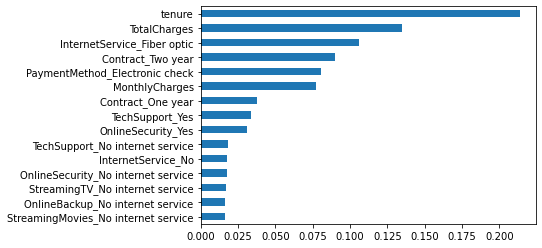

In [30]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')